
🎯 Goal: Analyze global retail sales data to uncover trends in revenue, profit, and customer behavior across regions, products, and time — and build interactive dashboards for business decision-making.



#  Day 1 Plan: SQL Basics (using pd functions) + Data Understanding


In [ ]:
#download data from kaggle
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
od.download("https://www.kaggle.com/datasets/vivek468/superstore-dataset-final")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemantk777
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final


100%|██████████| 550k/550k [00:00<00:00, 459MB/s]

In [ ]:
df = pd.read_csv("/content/superstore-dataset-final/Sample - Superstore.csv", encoding='latin1')

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df['Sales'].sum()

np.float64(2297200.8603000003)

In [ ]:
df.groupby("Region")['Sales'].sum().sort_values(ascending=False)   #Sales by Region

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df.groupby("Category")["Profit"].sum().sort_values(ascending=False).head()   #Top 5 Categories by Profit

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])    # Total Orders Per Year
df["year"]=df['Order Date'].dt.year
df['year'].value_counts().sort_index()

,count
year,
2014,1993
2015,2102
2016,2587
2017,3312


### 🔍 Day 1 Quick Findings:
- The **West** region has the highest total sales.
- **Technology** brings in the most profit.
- Sales were highest in **2017**, followed by 2016 and 2015.


# Day 2: Customer Segments, Business KPIs, and Grouping

In [ ]:
#  Segment-Level Sales and Profit
df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


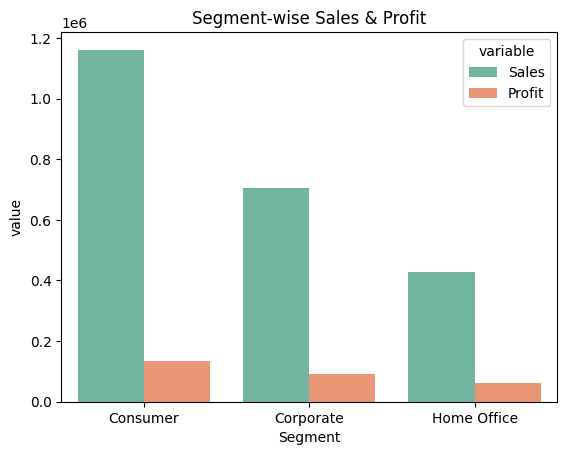

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
segment_data = pd.melt(segment_data, id_vars='Segment', value_vars=['Sales', 'Profit'])

sns.barplot(data=segment_data, x='Segment', y='value', hue='variable', palette='Set2')
plt.title("Segment-wise Sales & Profit")
plt.show()


In [ ]:
# Customer-Level Metrics
customer_summary = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Order ID': 'Total Orders'}).reset_index()

customer_summary['Avg Order Value'] = customer_summary['Sales'] / customer_summary['Total Orders']
customer_summary.sort_values(by='Sales', ascending=False).head()


,Customer ID,Sales,Profit,Total Orders,Avg Order Value
700,SM-20320,25043.050,-1980.7393,5,5008.6100
741,TC-20980,19052.218,8981.3239,5,3810.4436
621,RB-19360,15117.339,6976.0959,6,2519.5565
730,TA-21385,14595.620,4703.7883,4,3648.9050
6,AB-10105,14473.571,5444.8055,10,1447.3571


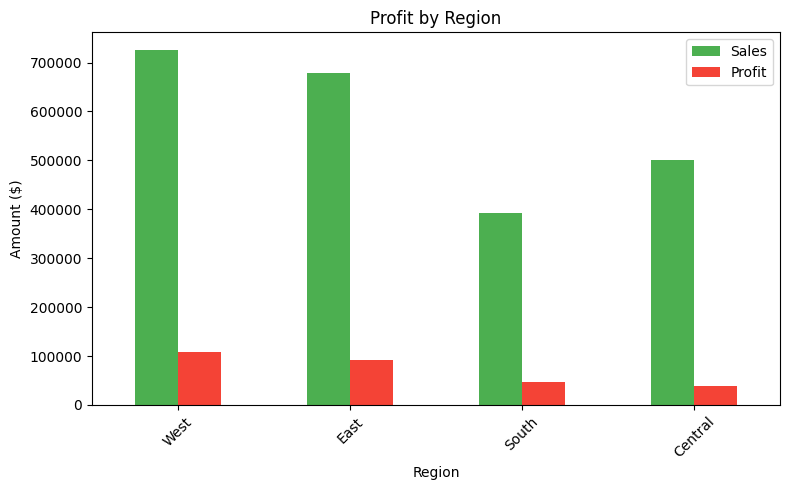

In [ ]:
# Region Performance
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
region_summary.plot(kind='bar', figsize=(8, 5), title='Profit by Region', color=['#4caf50', '#f44336'])
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📊 Key Business Insights (Day 2):

- 🔥 The **Consumer segment** generates the highest revenue, but **Corporate** has better profit margins.
- 🧭 The **West region** leads in both sales and profit.
- 🧍‍♂️ A small number of customers contribute heavily to total revenue (80/20 behavior).
